In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler,MaxAbsScaler,OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

import category_encoders as ce
from sklearn.model_selection import train_test_split,GridSearchCV, cross_validate, cross_val_score
from sklearn.metrics import accuracy_score,recall_score,precision_score,f1_score
from sklearn.metrics import roc_auc_score, roc_curve
from sklearn.metrics import confusion_matrix,classification_report

# from sklearn.dummy import DummyClassifier
# from sklearn.tree import DecisionTreeClassifier
# from sklearn.ensemble import RandomForestClassifier,GradientBoostingClassifier

In [4]:
pip install category_encoders

Note: you may need to restart the kernel to use updated packages.


In [5]:
#reading in the feature data
data1 = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\logistic_regression\training_set_features.csv")

In [6]:
data1.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Below Poverty,Not Married,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,"<= $75,000, Above Poverty",Not Married,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Below Poverty,Not Married,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,"<= $75,000, Above Poverty",Married,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb


In [7]:
# reading in the target data
data2 = pd.read_csv(r"C:\Users\Lenovo\OneDrive\Desktop\Imarticus\logistic_regression\training_set_labels.csv")
data2.head()

,respondent_id,h1n1_vaccine,seasonal_vaccine
0,0,0,0
1,1,0,1
2,2,0,0
3,3,0,1
4,4,0,0


In [8]:
# Exploring the percentage breakdown of the two classes in one possible target(seasonal flu rate)
data2['seasonal_vaccine'].value_counts(normalize=True)

seasonal_vaccine
0    0.534392
1    0.465608
Name: proportion, dtype: float64

In [9]:
# Exploring the percentage breakdown of the two classes in one possible target(H1N1 flu rate)
data2['h1n1_vaccine'].value_counts(normalize=True)

h1n1_vaccine
0    0.787546
1    0.212454
Name: proportion, dtype: float64

In [10]:
# Merging feature and target data
df = data1.merge(data2, how='left',on='respondent_id')
df.head()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,rent_or_own,employment_status,hhs_geo_region,census_msa,household_adults,household_children,employment_industry,employment_occupation,h1n1_vaccine,seasonal_vaccine
0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,...,Own,Not in Labor Force,oxchjgsf,Non-MSA,0.0,0.0,NaN,NaN,0,0
1,1,3.0,2.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,...,Rent,Employed,bhuqouqj,"MSA, Not Principle City",0.0,0.0,pxcmvdjn,xgwztkwe,0,1
2,2,1.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",2.0,0.0,rucpziij,xtkaffoo,0,0
3,3,1.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,...,Rent,Not in Labor Force,lrircsnp,"MSA, Principle City",0.0,0.0,NaN,NaN,0,1
4,4,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,Own,Employed,qufhixun,"MSA, Not Principle City",1.0,0.0,wxleyezf,emcorrxb,0,0


In [11]:
# Getting info about null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 38 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   respondent_id                26707 non-null  int64  
 1   h1n1_concern                 26615 non-null  float64
 2   h1n1_knowledge               26591 non-null  float64
 3   behavioral_antiviral_meds    26636 non-null  float64
 4   behavioral_avoidance         26499 non-null  float64
 5   behavioral_face_mask         26688 non-null  float64
 6   behavioral_wash_hands        26665 non-null  float64
 7   behavioral_large_gatherings  26620 non-null  float64
 8   behavioral_outside_home      26625 non-null  float64
 9   behavioral_touch_face        26579 non-null  float64
 10  doctor_recc_h1n1             24547 non-null  float64
 11  doctor_recc_seasonal         24547 non-null  float64
 12  chronic_med_condition        25736 non-null  float64
 13  child_under_6_mo

In [12]:
# Getting number of null values
# df.isna().sum()

In [13]:
# Explore numerical columns
df.describe()

,respondent_id,h1n1_concern,h1n1_knowledge,behavioral_antiviral_meds,behavioral_avoidance,behavioral_face_mask,behavioral_wash_hands,behavioral_large_gatherings,behavioral_outside_home,behavioral_touch_face,...,opinion_h1n1_vacc_effective,opinion_h1n1_risk,opinion_h1n1_sick_from_vacc,opinion_seas_vacc_effective,opinion_seas_risk,opinion_seas_sick_from_vacc,household_adults,household_children,h1n1_vaccine,seasonal_vaccine
count,26707.000000,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,...,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000,26707.000000
mean,13353.000000,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,...,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454,0.465608
std,7709.791156,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,...,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052,0.498825
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,6676.500000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,...,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,13353.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,...,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000,0.000000
75%,20029.500000,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000,1.000000
max,26706.000000,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000,1.000000


In [14]:
# Explore object columns(list comprehension)
df[[c for c in df.columns if df[c].dtype == 'object']].describe()

#count = no of non-null entries
#unique = no. of unique values in each column
#top = The most frequent value in each column.
#freq = Frequency of the most frequent value in each column.

,age_group,education,race,sex,income_poverty,marital_status,rent_or_own,employment_status,hhs_geo_region,census_msa,employment_industry,employment_occupation
count,26707,25300,26707,26707,22284,25299,24665,25244,26707,26707,13377,13237
unique,5,4,4,2,3,2,2,3,10,3,21,23
top,65+ Years,College Graduate,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,lzgpxyit,"MSA, Not Principle City",fcxhlnwr,xtkaffoo
freq,6843,10097,21222,15858,12777,13555,18736,13560,4297,11645,2468,1778


In [15]:
df['age_group'].value_counts()

age_group
65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: count, dtype: int64

In [16]:
df['marital_status'].value_counts()

marital_status
Married        13555
Not Married    11744
Name: count, dtype: int64

## EDA

In [18]:
# Mkaing a copy of main dataframe to use for visualizations
df2 = df.copy()

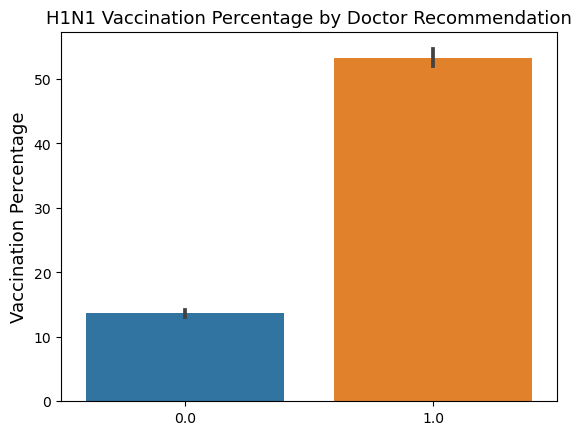

In [19]:
#Graph for relationship between HIN1 vaccination and doctor recommendation
dr = sns.barplot(x=df2['doctor_recc_h1n1'].dropna(), y=df2['h1n1_vaccine']*100)
dr.set_xlabel('')
dr.set_ylabel('Vaccination Percentage', fontsize = 13)
dr.set_title('H1N1 Vaccination Percentage by Doctor Recommendation', fontsize=13);
#the black line shows confidence interval line

In [20]:
# Creating dictionary for mapping in order to create better names for x axis in garphs below
ins_dict = {1: 'Health Insurance',
           0: 'No Health Insurance'}

In [21]:
# Creating the column that will be used to create clear x axis tick marks in graph below
df2['health_ins_words'] = df2['health_insurance'].replace(ins_dict)

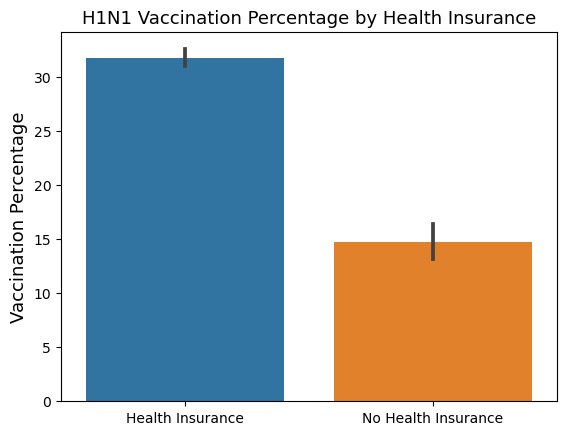

In [22]:
# Health insurance graph
ins = sns.barplot(x=df2['health_ins_words'], y=df2['h1n1_vaccine']*100)
ins.set_xlabel('')
ins.set_ylabel('Vaccination Percentage', fontsize=13)
ins.set_title('H1N1 Vaccination Percentage by Health Insurance', fontsize=13);

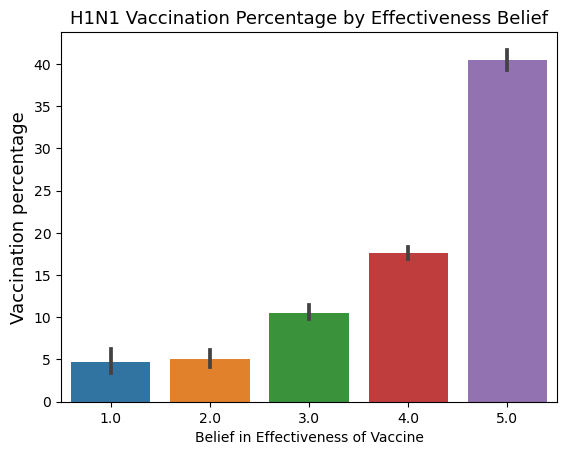

In [23]:
# Graph for vaccine percentage differentiation depending on opinion of effectiveness of H1N1 vaccine
ins = sns.barplot(x=df2['opinion_h1n1_vacc_effective'].dropna(), y=df2['h1n1_vaccine']*100)
ins.set_xlabel('Belief in Effectiveness of Vaccine')
ins.set_ylabel('Vaccination percentage', fontsize = 13)
ins.set_title('H1N1 Vaccination Percentage by Effectiveness Belief', fontsize=13);

## Data Preparation

In [25]:
# Define our x and y
X = df.drop(columns = ['respondent_id','h1n1_vaccine','seasonal_vaccine'], axis =1)
y = df['h1n1_vaccine']

In [26]:
#Regular train test split
X_tr, X_te,y_tr, y_te = train_test_split(X, y ,test_size=0.2, random_state=42)

In [27]:
# Set up lists for each columns datatype
num_cols = []
ohe_cols = []
freq_cols = []

for c in X.columns:
    if X[c].dtypes in ['float64', 'int64']:
        num_cols.append(c)
    elif X[c].nunique() < 10:
        ohe_cols.append(c)
    else:
        freq_cols.append(c)

In [28]:
# We wanted to see each column category
print(f"Numerical Columns:", num_cols)
print('\n')
print(f'Object Columns (with less than 10 unique values):',ohe_cols)
print('\n')
print(f'Object columns (with more than 10 unique values):', freq_cols)

Numerical Columns: ['h1n1_concern', 'h1n1_knowledge', 'behavioral_antiviral_meds', 'behavioral_avoidance', 'behavioral_face_mask', 'behavioral_wash_hands', 'behavioral_large_gatherings', 'behavioral_outside_home', 'behavioral_touch_face', 'doctor_recc_h1n1', 'doctor_recc_seasonal', 'chronic_med_condition', 'child_under_6_months', 'health_worker', 'health_insurance', 'opinion_h1n1_vacc_effective', 'opinion_h1n1_risk', 'opinion_h1n1_sick_from_vacc', 'opinion_seas_vacc_effective', 'opinion_seas_risk', 'opinion_seas_sick_from_vacc', 'household_adults', 'household_children']


Object Columns (with less than 10 unique values): ['age_group', 'education', 'race', 'sex', 'income_poverty', 'marital_status', 'rent_or_own', 'employment_status', 'census_msa']


Object columns (with more than 10 unique values): ['hhs_geo_region', 'employment_industry', 'employment_occupation']


In [29]:
len(freq_cols)

3

In [30]:
# Preprocessing with pipelines
num_transformer = Pipeline(steps=[
    ('num_imputer',IterativeImputer(max_iter=100, random_state=42)), #replace missing value by IterativeImputer
    ('minmaxscaler', MinMaxScaler())                                 # Scale the numbers by MinMaxScaler
])

ohe_transformer = Pipeline(steps=[
    ('ohe_imputer', SimpleImputer(strategy='constant', fill_value='Unknown')),  #replace missing value by SimpleImputer
    ('ohe_encoder', OneHotEncoder(handle_unknown='ignore'))                     # Transform each category into a new column
])

freq_transformer = Pipeline(steps=[
    ('freq_encoder',ce.count.CountEncoder(normalize=True, min_group_size=.05)),   #replace category names with frequency counts
    ('freq_imputer', IterativeImputer(max_iter=100, random_state=42))             #replace missing value by IterativeImputer
])

In [31]:
# simple imputer explanation
data = np.array([[1,2],[np.nan,3],[7,np.nan]])
print(data)
#Initialize the SimpleImputer with the mean strategy
imputer = SimpleImputer(strategy='mean')

#Fit and transform the data
imputed_data = imputer.fit_transform(data)
print(imputed_data)

[[ 1.  2.]
 [nan  3.]
 [ 7. nan]]
[[1.  2. ]
 [4.  3. ]
 [7.  2.5]]


In [32]:
# Example dataframe with multiple categorical columns
df = pd.DataFrame({
        'Color':['Red','Blue','Green','Blue','Red','Green','Red'],
        'Size':['S','M','L','M','S','L','M']
})
print(df)
#Initialize CountEncoder
encoder = ce.CountEncoder(cols=['Color','Size'])

#Fit and transform the data
df_encoded = encoder.fit_transform(df)

#Display the encoded DataFrame
print(df_encoded)

   Color Size
0    Red    S
1   Blue    M
2  Green    L
3   Blue    M
4    Red    S
5  Green    L
6    Red    M
   Color  Size
0      3     2
1      2     3
2      2     2
3      2     3
4      3     2
5      2     2
6      3     3


In [33]:
# Preprocessor defined using ColumnTransformer by packing the all components together
preprocessor = ColumnTransformer(
    transformers=[
        ('num',num_transformer, num_cols),
        ('ohe', ohe_transformer, ohe_cols),
        ('freq', freq_transformer, freq_cols)
])

In [34]:
# Fitting preprocessor to see the components as a while
preprocessor.fit(X_tr)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('num_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42)),
                                                 ('minmaxscaler',
                                                  MinMaxScaler())]),
                                 ['h1n1_concern', 'h1n1_knowledge',
                                  'behavioral_antiviral_meds',
                                  'behavioral_avoidance',
                                  'behavioral_face_mask',
                                  'behavioral_wash_hands',
                                  'behavioral_large_gatherings',
                                  'behavioral_outside_home',
                                  'behavioral...
                                 ['age_group', 'education', 'race', 'sex',
                                  'income_poverty', 'marital_status',
                                  'rent_or_own', 'employment_status',
                                  'census_msa']),
                                ('freq',
                                 Pipeline(steps=[('freq_encoder',
                                                  CountEncoder(combine_min_nan_groups=True,
                                                               min_group_size=0.05,
                                                               normalize=True)),
                                                 ('freq_imputer',
                                                  IterativeImputer(max_iter=100,
                                                                   random_state=42))]),
                                 ['hhs_geo_region', 'employment_industry',
                                  'employment_occupation'])])

In [35]:
# Lets see what this looks like after the preprocessor transformation
X_tr_transformed = preprocessor.transform(X_tr)
X_tr_transformed.shape

(21365, 59)

In [36]:
# Visualize it with Pandas dataframe
pd.DataFrame(X_tr_transformed).head()

,0,1,2,3,4,5,6,7,8,9,...,49,50,51,52,53,54,55,56,57,58
0,0.666667,0.5,0.014625,0.967488,0.043917,0.894587,0.0,1.0,1.0,0.133733,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.159420,0.497402,0.502504
1,0.666667,0.5,1.000000,0.967488,1.000000,0.894587,1.0,1.0,1.0,0.133733,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.159420,0.066791,0.374865
2,0.000000,0.5,0.014625,0.000000,0.043917,0.894587,0.0,1.0,0.0,0.133733,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.117061,0.341774,0.065809
3,0.333333,0.5,0.014625,0.000000,0.043917,0.000000,0.0,0.0,0.0,0.133733,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.105032,0.341774,0.374865
4,0.333333,0.0,0.014625,0.000000,0.043917,0.894587,0.0,0.0,0.0,0.133733,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.082659,0.497402,0.502504


### Modeling

## MODEL 1: Logistic Regression


In [38]:
#Setting up the logistic regression model to go through the pipeline
logreg = Pipeline(steps=[
    ('preprocessor',preprocessor),
    ('classifier',LogisticRegression())
])

In [39]:
# fitting the logistic regression model on the training data
l = logreg.fit(X_tr,y_tr)
l

C:\Users\Lenovo\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('num_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42)),
                                                                  ('minmaxscaler',
                                                                   MinMaxScaler())]),
                                                  ['h1n1_concern',
                                                   'h1n1_knowledge',
                                                   'behavioral_antiviral_meds',
                                                   'behavioral_avoidance',
                                                   'behavioral_face_mask',
                                                   'behavioral_wash_hands',
                                                   'behavioral_large_gatherings',
                                                   'beha...
                                                   'marital_status',
                                                   'rent_or_own',
                                                   'employment_status',
                                                   'census_msa']),
                                                 ('freq',
                                                  Pipeline(steps=[('freq_encoder',
                                                                   CountEncoder(combine_min_nan_groups=True,
                                                                                min_group_size=0.05,
                                                                                normalize=True)),
                                                                  ('freq_imputer',
                                                                   IterativeImputer(max_iter=100,
                                                                                    random_state=42))]),
                                                  ['hhs_geo_region',
                                                   'employment_industry',
                                                   'employment_occupation'])])),
                ('classifier', LogisticRegression())])

In [40]:
y_pred = l.predict(X_te)

In [41]:
log_acc = accuracy_score(y_te,y_pred)
log_acc

0.8390116061400225

In [42]:
print(classification_report(y_te,y_pred))

              precision    recall  f1-score   support

           0       0.86      0.95      0.90      4212
           1       0.69      0.43      0.53      1130

    accuracy                           0.84      5342
   macro avg       0.78      0.69      0.72      5342
weighted avg       0.83      0.84      0.82      5342



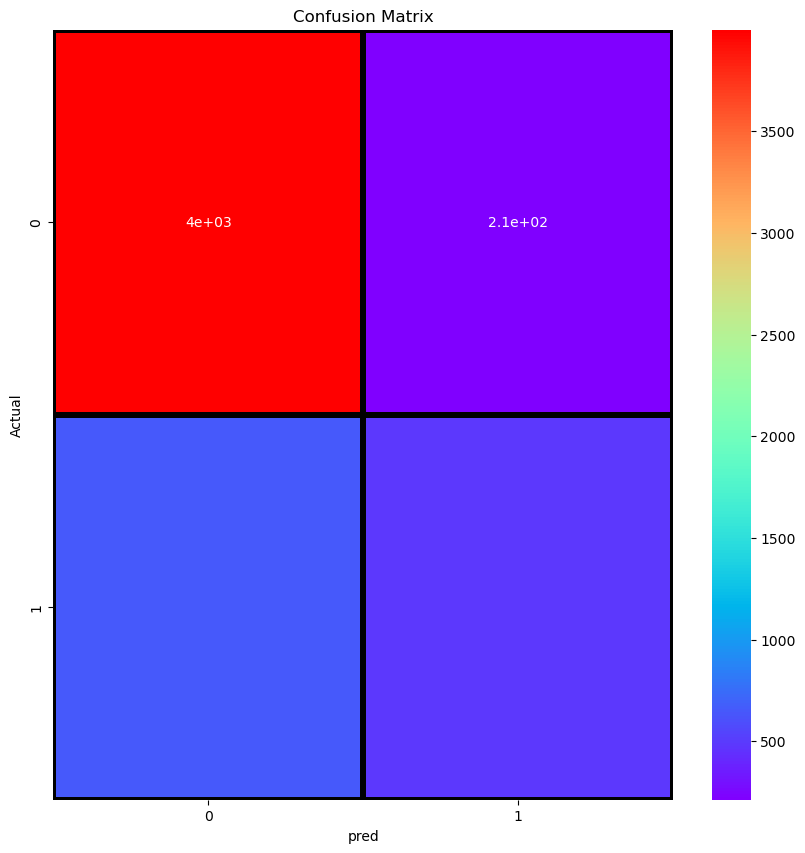

In [43]:
cf = confusion_matrix(y_te,y_pred)
plt.figure(figsize = (10,10))
sns.heatmap(cf,annot = True,cmap = 'rainbow',linecolor = 'black',lw=3)
plt.ylabel('Actual')
plt.xlabel('pred')
plt.title('Confusion Matrix')
plt.show()

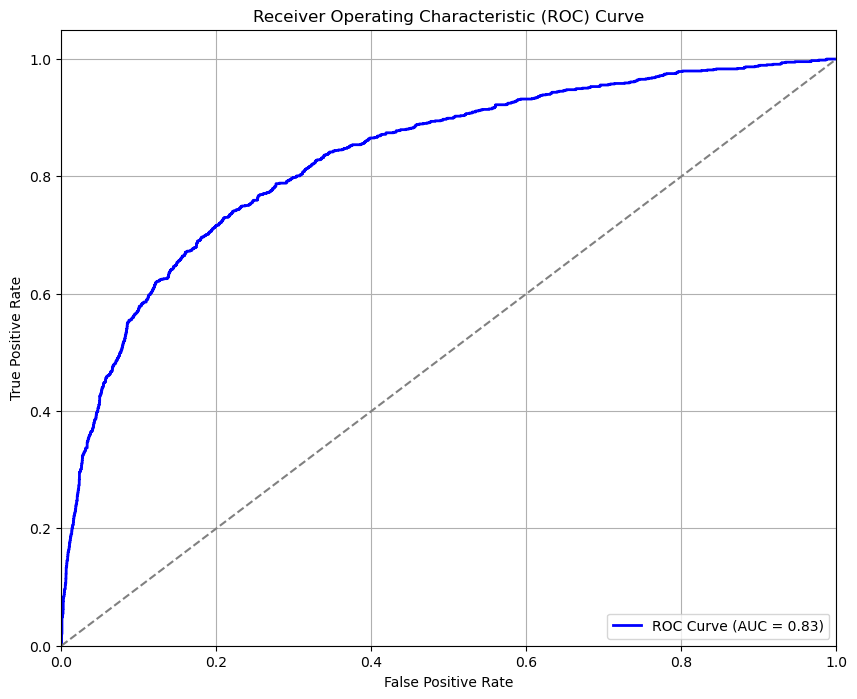

In [87]:
from sklearn.metrics import roc_curve,roc_auc_score

y_prob = l.predict_proba(X_te)[:, 1]
fpr,tpr,thresholds = roc_curve(y_te, y_prob)
roc_auc = roc_auc_score(y_te,y_prob)

plt.figure(figsize = (10,8))
plt.plot(fpr,tpr,color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0,1], [0,1], color ='gray', linestyle ='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()